c:\Users\Admin\scrap\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[INFO]: Epoch 1 of 10
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Validation


  0%|          | 0/1 [00:00<?, ?it/s]

Training loss: 0.556, training acc: 77.236
Validation loss: 0.340, validation acc: 93.333
--------------------------------------------------
[INFO]: Epoch 2 of 10
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Validation


  0%|          | 0/1 [00:00<?, ?it/s]

Training loss: 0.224, training acc: 95.122
Validation loss: 0.125, validation acc: 100.000
--------------------------------------------------
[INFO]: Epoch 3 of 10
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Validation


  0%|          | 0/1 [00:00<?, ?it/s]

Training loss: 0.076, training acc: 98.374
Validation loss: 0.040, validation acc: 100.000
--------------------------------------------------
[INFO]: Epoch 4 of 10
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Validation


  0%|          | 0/1 [00:00<?, ?it/s]

Training loss: 0.017, training acc: 100.000
Validation loss: 0.012, validation acc: 100.000
--------------------------------------------------
[INFO]: Epoch 5 of 10
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Validation


  0%|          | 0/1 [00:00<?, ?it/s]

Training loss: 0.003, training acc: 100.000
Validation loss: 0.005, validation acc: 100.000
--------------------------------------------------
[INFO]: Epoch 6 of 10
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Validation


  0%|          | 0/1 [00:00<?, ?it/s]

Training loss: 0.001, training acc: 100.000
Validation loss: 0.004, validation acc: 100.000
--------------------------------------------------
[INFO]: Epoch 7 of 10
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Validation


  0%|          | 0/1 [00:00<?, ?it/s]

Training loss: 0.000, training acc: 100.000
Validation loss: 0.003, validation acc: 100.000
--------------------------------------------------
[INFO]: Epoch 8 of 10
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Validation


  0%|          | 0/1 [00:00<?, ?it/s]

Training loss: 0.000, training acc: 100.000
Validation loss: 0.002, validation acc: 100.000
--------------------------------------------------
[INFO]: Epoch 9 of 10
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Validation


  0%|          | 0/1 [00:00<?, ?it/s]

Training loss: 0.000, training acc: 100.000
Validation loss: 0.001, validation acc: 100.000
--------------------------------------------------
[INFO]: Epoch 10 of 10
Training


  0%|          | 0/4 [00:00<?, ?it/s]

Validation


  0%|          | 0/1 [00:00<?, ?it/s]

Training loss: 0.000, training acc: 100.000
Validation loss: 0.001, validation acc: 100.000
--------------------------------------------------
TRAINING COMPLETE


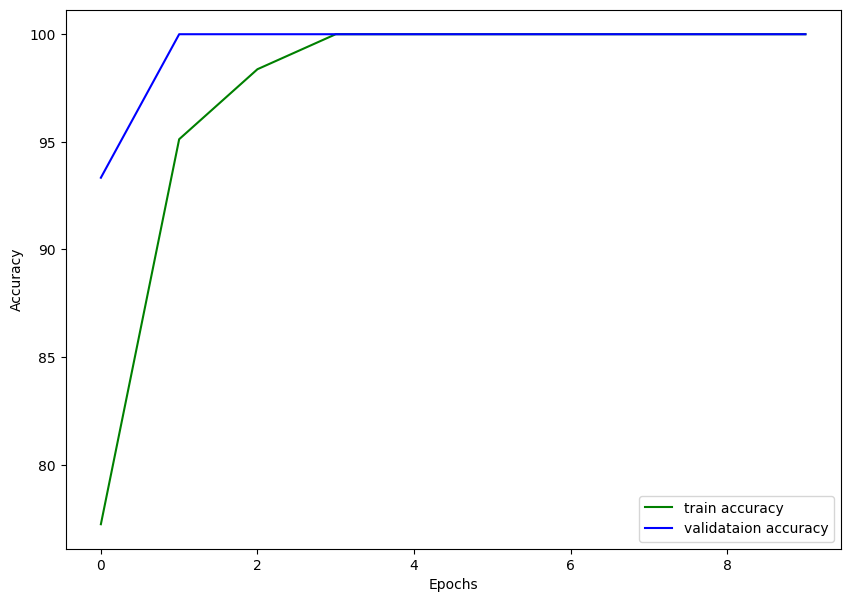

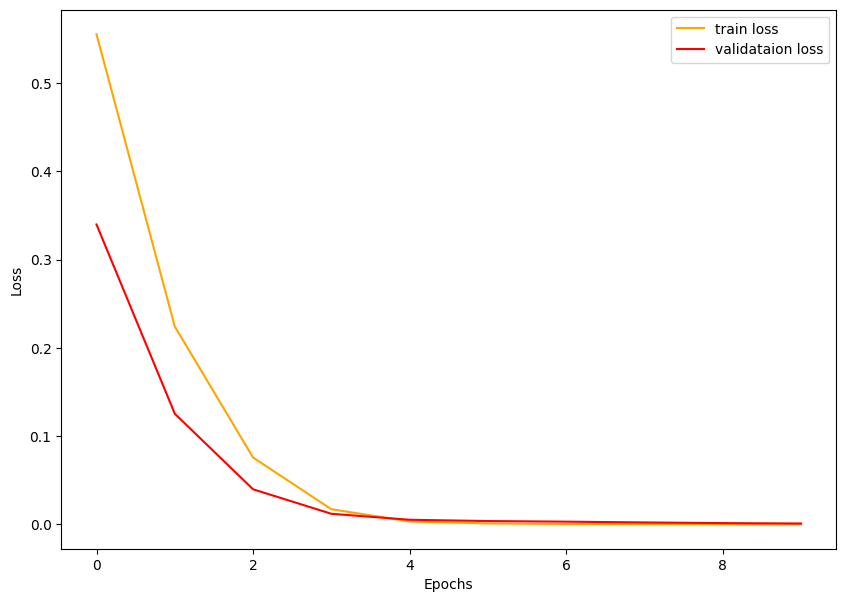

In [8]:
import argparse
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import models

from data_setup import train_loader, valid_loader
from utils import save_model, save_plots, train, validate
from model import model_resnet18, model_efficientnet

# construct the argument parser
#parser = argparse.ArgumentParser()
#parser.add_argument('--epochs', type=int, default=10,
#    help='number of epochs to train our network for')
#parser.add_argument('--model', type = str, default= 'Resnet',
#    help='name of model to test: Resnet or Efficient')
#args = vars(parser.parse_args())

# Initialize the model
#name = args.model
name= 'Efficient'

if name == 'Resnet':
    model = model_resnet18() 
if name == 'Efficient':
    model = model_efficientnet()

# Manually set weight
class_weight = [153/45, 153/108]
class_weight = torch.tensor(class_weight, dtype=torch.float32)
#positive_weight = torch.tensor(1)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss(weight= class_weight)
optimizer = optim.Adam(model.parameters(), lr=1e-04)

# Training parameter
num_epochs = 10

# lists to keep track of losses and accuracies
train_loss, valid_loss = [], []
train_acc, valid_acc = [], []

# start the training
for epoch in range(num_epochs):
    print(f"[INFO]: Epoch {epoch+1} of {num_epochs}")
    train_epoch_loss, train_epoch_acc = train(model, train_loader, 
                                              optimizer, criterion)
    valid_epoch_loss, valid_epoch_acc = validate(model, valid_loader,  
                                                 criterion)
    train_loss.append(train_epoch_loss)
    valid_loss.append(valid_epoch_loss)
    train_acc.append(train_epoch_acc)
    valid_acc.append(valid_epoch_acc)
    print(f"Training loss: {train_epoch_loss:.3f}, training acc: {train_epoch_acc:.3f}")
    print(f"Validation loss: {valid_epoch_loss:.3f}, validation acc: {valid_epoch_acc:.3f}")
    print('-'*50)

# save the trained model weights
save_model(num_epochs, model, optimizer, criterion)
# save the loss and accuracy plots
save_plots(train_acc, valid_acc, train_loss, valid_loss)
print('TRAINING COMPLETE')

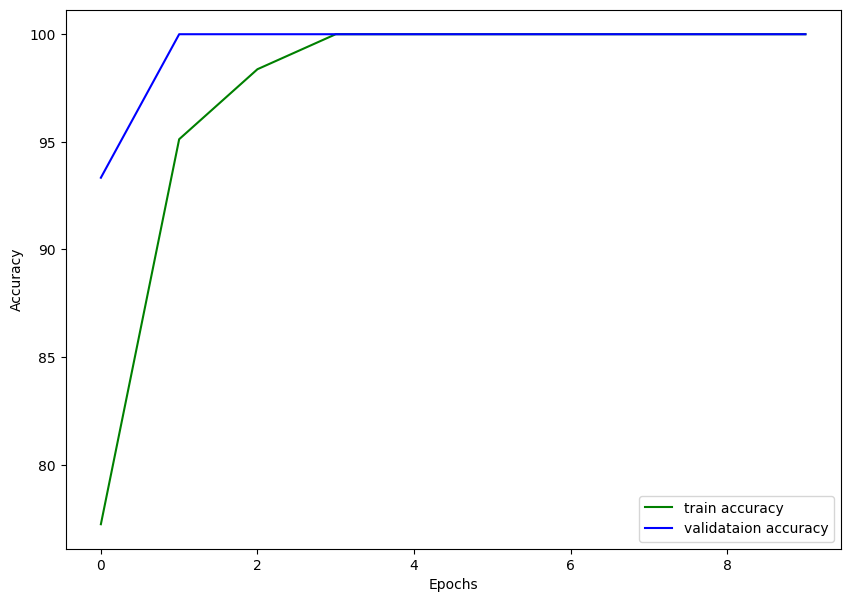

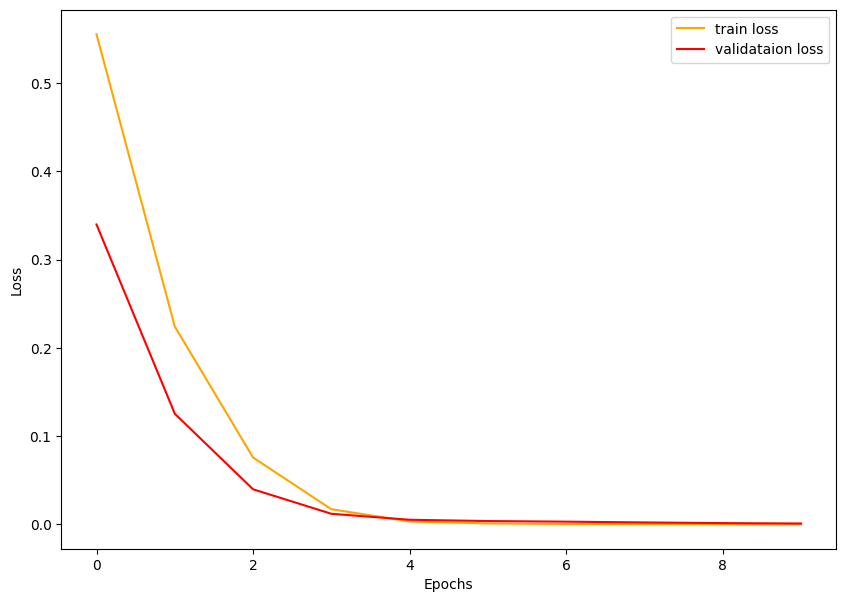

In [9]:
# save the loss and accuracy plots
from utils import save_plots
save_plots(train_acc, valid_acc, train_loss, valid_loss)